In [1]:
import pandas as pd

In [9]:
a = pd.read_csv('/home/lux/ci-demo/Calibration CIAPOL_Data354.xlsx - Sheet1.csv')

In [10]:
a

,timestamp,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708
0,3/22/25 1:00,7.26,34,41,34,40
1,3/22/25 2:00,32.69,14,17,13,17
2,3/22/25 3:00,15.14,6,9,5,8
3,3/22/25 4:00,7.54,7,9,6,8
4,3/22/25 5:00,7.31,11,20,11,15
...,...,...,...,...,...,...
379,4/6/25 20:00,14.62,3,5,3,6
380,4/6/25 21:00,6.13,3,5,3,5
381,4/6/25 22:00,5.78,3,4,3,5
382,4/6/25 23:00,5.34,3,4,3,5


In [13]:
from sklearn.linear_model import LinearRegression

In [ ]:
data_airquino = pd.read_excel('Calibration CIAPOL_Data354.xlsx')

In [34]:
data_airquino

,timestamp,"PM2,5",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,PM10,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,RH,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,T,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,Référence du CIAPOL,Capteurs de data354,NaN,NaN,NaN,Référence du CIAPOL,Capteurs de data354,NaN,NaN,...,Référence du CIAPOL,Capteurs de data354,NaN,NaN,NaN,Référence du CIAPOL,Capteurs de data354,NaN,NaN,NaN
2,NaT,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,...,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708
3,2025-03-22 01:00:00,7.26,34,41,34,40,9.37,72,73,75,...,NaN,92,96,95,96,NaN,26.6,26.6,26.6,26.7
4,2025-03-22 02:00:00,32.69,14,17,13,17,40.06,33,32,34,...,NaN,93,96,96,97,NaN,26.5,26.5,26.4,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2025-04-06 20:00:00,14.62,3,5,3,6,18.25,16,14,17,...,NaN,87,90,90,90,NaN,28.2,28.2,28.1,28.3
383,2025-04-06 21:00:00,6.13,3,5,3,5,8,14,13,16,...,NaN,87,91,91,91,NaN,28.1,28.1,28,28.2
384,2025-04-06 22:00:00,5.78,3,4,3,5,7.58,14,13,15,...,NaN,88,91,91,91,NaN,27.9,27.9,27.9,28
385,2025-04-06 23:00:00,5.34,3,4,3,5,7.05,14,12,16,...,NaN,88,92,92,92,NaN,27.8,27.8,27.7,27.9


In [36]:
def transform(df, col_names):
    # Sélectionne uniquement les 6 premières colonnes nécessaires
    df = df.iloc[:, :len(col_names)]
    
    # Renommer les colonnes
    df.columns = col_names

    # Supprimer les 3 premières lignes (souvent des entêtes parasites)
    df = df.iloc[3:, :]

    # Convertir les colonnes sauf 'timestamp' en float
    cols_to_convert = df.columns.difference(['timestamp'])
    df[cols_to_convert] = df[cols_to_convert].astype(float)

    return df


In [45]:
PM25= transform(data_airquino,["timestamp", "CAIRNET", "CIAPOL1-AIRQ_10651", "CIAPOL2-AIRQ_11101", "CIAPOL3-AIRQ_11701", "CIAPOL4-AIRQ_11708"])
PM25

,timestamp,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708
3,2025-03-22 01:00:00,7.26,34.0,41.0,34.0,40.0
4,2025-03-22 02:00:00,32.69,14.0,17.0,13.0,17.0
5,2025-03-22 03:00:00,15.14,6.0,9.0,5.0,8.0
6,2025-03-22 04:00:00,7.54,7.0,9.0,6.0,8.0
7,2025-03-22 05:00:00,7.31,11.0,20.0,11.0,15.0
...,...,...,...,...,...,...
382,2025-04-06 20:00:00,14.62,3.0,5.0,3.0,6.0
383,2025-04-06 21:00:00,6.13,3.0,5.0,3.0,5.0
384,2025-04-06 22:00:00,5.78,3.0,4.0,3.0,5.0
385,2025-04-06 23:00:00,5.34,3.0,4.0,3.0,5.0


In [39]:
PM25_data_a

,timestamp,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708
3,2025-03-22 01:00:00,7.26,34.0,41.0,34.0,40.0
4,2025-03-22 02:00:00,32.69,14.0,17.0,13.0,17.0
5,2025-03-22 03:00:00,15.14,6.0,9.0,5.0,8.0
6,2025-03-22 04:00:00,7.54,7.0,9.0,6.0,8.0
7,2025-03-22 05:00:00,7.31,11.0,20.0,11.0,15.0
...,...,...,...,...,...,...
382,2025-04-06 20:00:00,14.62,3.0,5.0,3.0,6.0
383,2025-04-06 21:00:00,6.13,3.0,5.0,3.0,5.0
384,2025-04-06 22:00:00,5.78,3.0,4.0,3.0,5.0
385,2025-04-06 23:00:00,5.34,3.0,4.0,3.0,5.0


In [43]:
PM10 =  data_airquino[["timestamp","PM10","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10"]]

In [44]:
PM10 = transform(PM10,["timestamp", "CAIRNET", "CIAPOL1-AIRQ_10651", "CIAPOL2-AIRQ_11101", "CIAPOL3-AIRQ_11701", "CIAPOL4-AIRQ_11708"])
PM10

,timestamp,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708
3,2025-03-22 01:00:00,9.37,72.0,73.0,75.0,86.0
4,2025-03-22 02:00:00,40.06,33.0,32.0,34.0,43.0
5,2025-03-22 03:00:00,18.88,16.0,17.0,18.0,22.0
6,2025-03-22 04:00:00,9.70,16.0,18.0,19.0,23.0
7,2025-03-22 05:00:00,9.43,23.0,28.0,27.0,30.0
...,...,...,...,...,...,...
382,2025-04-06 20:00:00,18.25,16.0,14.0,17.0,21.0
383,2025-04-06 21:00:00,8.00,14.0,13.0,16.0,19.0
384,2025-04-06 22:00:00,7.58,14.0,13.0,15.0,19.0
385,2025-04-06 23:00:00,7.05,14.0,12.0,16.0,19.0


In [47]:
PM25.isnull().sum()

timestamp             0
CAIRNET               0
CIAPOL1-AIRQ_10651    0
CIAPOL2-AIRQ_11101    0
CIAPOL3-AIRQ_11701    0
CIAPOL4-AIRQ_11708    0
dtype: int64

In [48]:
PM10.isna().sum()

timestamp             0
CAIRNET               0
CIAPOL1-AIRQ_10651    0
CIAPOL2-AIRQ_11101    0
CIAPOL3-AIRQ_11701    0
CIAPOL4-AIRQ_11708    0
dtype: int64

In [49]:
# Régression
X = PM25[["CIAPOL1-AIRQ_10651"]]
y = PM25["CAIRNET"]

model = LinearRegression()
model.fit(X, y)

alpha = model.intercept_
beta = model.coef_[0]
r2 = model.score(X, y)

print(f"Formule : PM_calibré = {alpha:.2f} + {beta:.2f} * PM_CIAPOL1")
print(f"R² du modèle : {r2:.2f}")

Formule : PM_calibré = 5.81 + 0.55 * PM_CIAPOL1
R² du modèle : 0.29


In [51]:
# Régression
X = PM10[["CIAPOL1-AIRQ_10651"]]
y = PM10["CAIRNET"]

model = LinearRegression()
model.fit(X, y)

alpha = model.intercept_
beta = model.coef_[0]
r2 = model.score(X, y)

print(f"Formule : PM_calibré = {alpha:.2f} + {beta:.2f} * PM_CIAPOL1")
print(f"R² du modèle : {r2:.2f}")

Formule : PM_calibré = 6.41 + 0.35 * PM_CIAPOL1
R² du modèle : 0.23


In [53]:
print(data_airquino.columns)

Index(['timestamp', 'PM2,5', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'PM10', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'NO2', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'CO', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'RH', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'T', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')


In [79]:
temperature = data_airquino[["timestamp","T","Unnamed: 29","Unnamed: 29","Unnamed: 29","Unnamed: 29"]]
temperature = transform(temperature,["timestamp", "CAIRNET", "CIAPOL1-AIRQ_10651_T", "CIAPOL2-AIRQ_11101_T", "CIAPOL3-AIRQ_11701_T", "CIAPOL4-AIRQ_11708_T"]) 
temperature

,timestamp,CAIRNET,CIAPOL1-AIRQ_10651_T,CIAPOL2-AIRQ_11101_T,CIAPOL3-AIRQ_11701_T,CIAPOL4-AIRQ_11708_T
3,2025-03-22 01:00:00,NaN,26.6,26.6,26.6,26.6
4,2025-03-22 02:00:00,NaN,26.5,26.5,26.5,26.5
5,2025-03-22 03:00:00,NaN,26.5,26.5,26.5,26.5
6,2025-03-22 04:00:00,NaN,26.4,26.4,26.4,26.4
7,2025-03-22 05:00:00,NaN,26.4,26.4,26.4,26.4
...,...,...,...,...,...,...
382,2025-04-06 20:00:00,NaN,28.2,28.2,28.2,28.2
383,2025-04-06 21:00:00,NaN,28.1,28.1,28.1,28.1
384,2025-04-06 22:00:00,NaN,27.9,27.9,27.9,27.9
385,2025-04-06 23:00:00,NaN,27.8,27.8,27.8,27.8


In [ ]:
temperature

In [68]:

from sklearn.metrics import r2_score



def calibrate_PM(df, reference_sensor="CAIRNET"):
    results = []

    # Capteurs low-cost (tous sauf timestamp et CAIRNET)
    capteurs = [col for col in df.columns if col not in ["timestamp", reference_sensor]]

    for capteur in capteurs:
        try:
            # Données X (capteur low-cost) et y (capteur de référence)
            x = df[[capteur]].astype(float)
            y = df[reference_sensor].astype(float)

            model = LinearRegression()
            model.fit(x, y)

            y_pred = model.predict(x)
            r2 = r2_score(y, y_pred)

            results.append({
                "capteur": capteur,
                "a": round(model.intercept_, 2),
                "b": round(model.coef_[0], 2),
                "r2": round(r2, 2)
            })
        except Exception as e:
            print(f"Erreur pour {capteur} : {e}")

    return pd.DataFrame(results)



In [64]:
print(PM25.columns)

Index(['timestamp', 'CAIRNET', 'CIAPOL1-AIRQ_10651', 'CIAPOL2-AIRQ_11101',
       'CIAPOL3-AIRQ_11701', 'CIAPOL4-AIRQ_11708'],
      dtype='object')


In [69]:
calib_pm25=calibrate_PM(PM25)
print(calib_pm25)

              capteur     a     b    r2
0  CIAPOL1-AIRQ_10651  5.81  0.55  0.29
1  CIAPOL2-AIRQ_11101  5.50  0.40  0.26
2  CIAPOL3-AIRQ_11701  5.79  0.57  0.29
3  CIAPOL4-AIRQ_11708  5.09  0.48  0.28


In [70]:
calib_pm10 = calibrate_PM(PM10)
print(calib_pm10)

              capteur     a     b    r2
0  CIAPOL1-AIRQ_10651  6.41  0.35  0.23
1  CIAPOL2-AIRQ_11101  7.04  0.30  0.20
2  CIAPOL3-AIRQ_11701  5.84  0.34  0.22
3  CIAPOL4-AIRQ_11708  5.65  0.28  0.22


In [71]:
def apply_calibration(df, calibration_results, ref_col="CAIRNET"):
    calibrated_df = df[["timestamp", ref_col]].copy()

    for _, row in calibration_results.iterrows():
        capteur = row["capteur"]
        a = row["a"]
        b = row["b"]

        if capteur in df.columns:
            # Appliquer la formule de calibration
            calibrated_df[f"{capteur}_calibré"] = a + b * df[capteur].astype(float)

    return calibrated_df


In [72]:


# Étape  : application des formules calibrées
df_PM25_calibré = apply_calibration(PM25, calib_pm25)
df_PM25_calibré


,timestamp,CAIRNET,CIAPOL1-AIRQ_10651_calibré,CIAPOL2-AIRQ_11101_calibré,CIAPOL3-AIRQ_11701_calibré,CIAPOL4-AIRQ_11708_calibré
3,2025-03-22 01:00:00,7.26,24.51,21.9,25.17,24.29
4,2025-03-22 02:00:00,32.69,13.51,12.3,13.20,13.25
5,2025-03-22 03:00:00,15.14,9.11,9.1,8.64,8.93
6,2025-03-22 04:00:00,7.54,9.66,9.1,9.21,8.93
7,2025-03-22 05:00:00,7.31,11.86,13.5,12.06,12.29
...,...,...,...,...,...,...
382,2025-04-06 20:00:00,14.62,7.46,7.5,7.50,7.97
383,2025-04-06 21:00:00,6.13,7.46,7.5,7.50,7.49
384,2025-04-06 22:00:00,5.78,7.46,7.1,7.50,7.49
385,2025-04-06 23:00:00,5.34,7.46,7.1,7.50,7.49


In [73]:
PM25

,timestamp,CAIRNET,CIAPOL1-AIRQ_10651,CIAPOL2-AIRQ_11101,CIAPOL3-AIRQ_11701,CIAPOL4-AIRQ_11708
3,2025-03-22 01:00:00,7.26,34.0,41.0,34.0,40.0
4,2025-03-22 02:00:00,32.69,14.0,17.0,13.0,17.0
5,2025-03-22 03:00:00,15.14,6.0,9.0,5.0,8.0
6,2025-03-22 04:00:00,7.54,7.0,9.0,6.0,8.0
7,2025-03-22 05:00:00,7.31,11.0,20.0,11.0,15.0
...,...,...,...,...,...,...
382,2025-04-06 20:00:00,14.62,3.0,5.0,3.0,6.0
383,2025-04-06 21:00:00,6.13,3.0,5.0,3.0,5.0
384,2025-04-06 22:00:00,5.78,3.0,4.0,3.0,5.0
385,2025-04-06 23:00:00,5.34,3.0,4.0,3.0,5.0


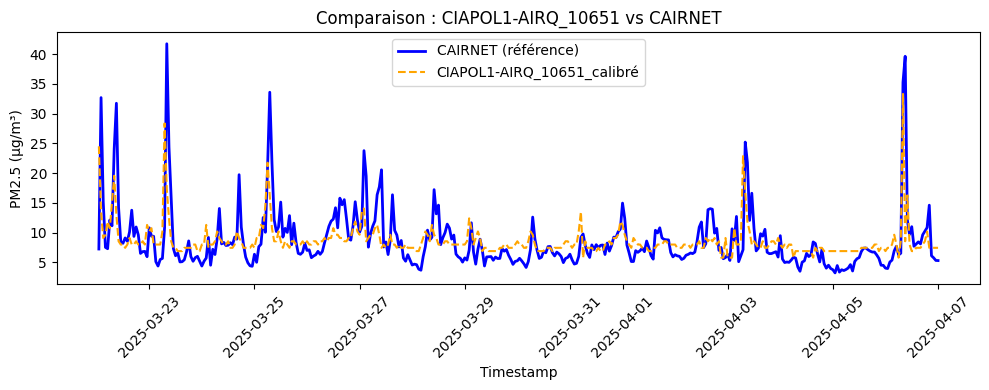

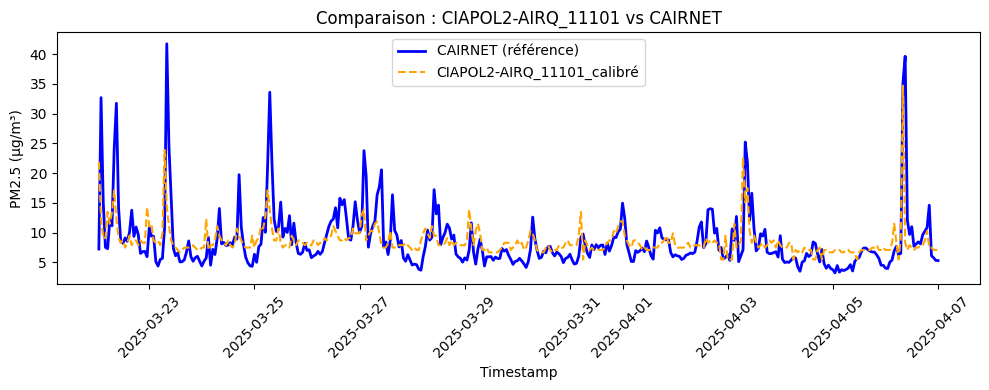

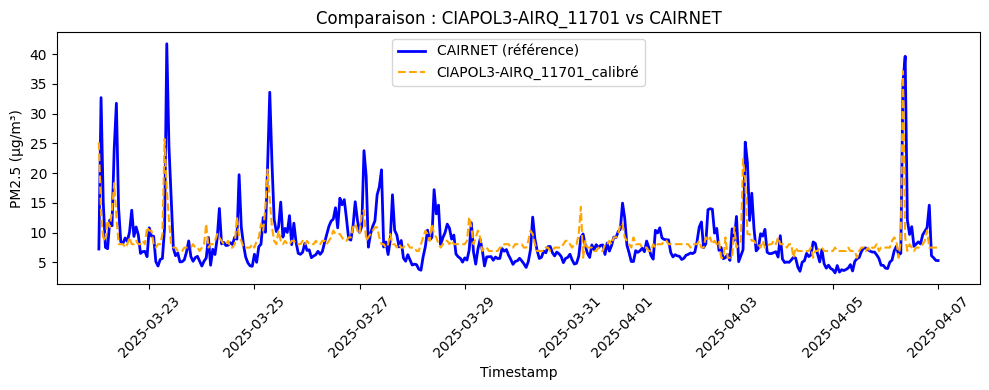

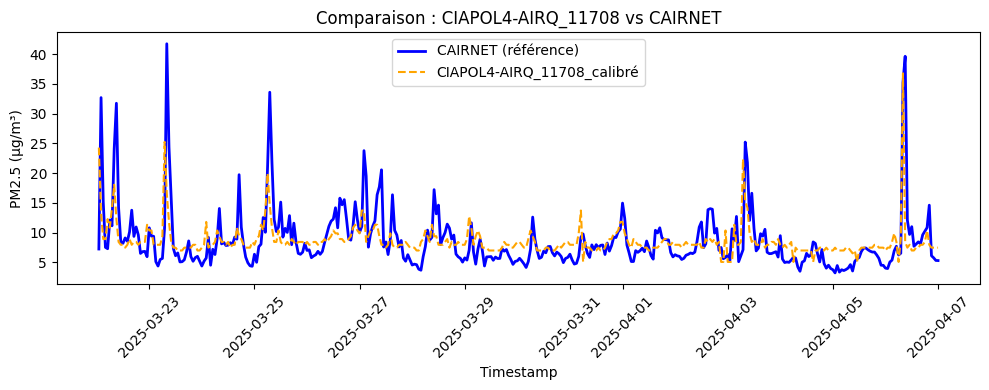

In [75]:
import matplotlib.pyplot as plt

def plot_comparaison_par_capteur(df_calibré):
    capteurs_calibrés = [col for col in df_calibré.columns if "_calibré" in col]
    
    for capteur in capteurs_calibrés:
        plt.figure(figsize=(10, 4))
        plt.plot(df_calibré["timestamp"], df_calibré["CAIRNET"], label="CAIRNET (référence)", color="blue", linewidth=2)
        plt.plot(df_calibré["timestamp"], df_calibré[capteur], label=capteur, color="orange", linestyle="--")

        plt.title(f"Comparaison : {capteur.replace('_calibré', '')} vs CAIRNET")
        plt.xlabel("Timestamp")
        plt.ylabel("PM2.5 (µg/m³)")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_comparaison_par_capteur(df_PM25_calibré)

In [80]:
temperature.drop("CAIRNET", axis=1, inplace=True)
temperature

,timestamp,CIAPOL1-AIRQ_10651_T,CIAPOL2-AIRQ_11101_T,CIAPOL3-AIRQ_11701_T,CIAPOL4-AIRQ_11708_T
3,2025-03-22 01:00:00,26.6,26.6,26.6,26.6
4,2025-03-22 02:00:00,26.5,26.5,26.5,26.5
5,2025-03-22 03:00:00,26.5,26.5,26.5,26.5
6,2025-03-22 04:00:00,26.4,26.4,26.4,26.4
7,2025-03-22 05:00:00,26.4,26.4,26.4,26.4
...,...,...,...,...,...
382,2025-04-06 20:00:00,28.2,28.2,28.2,28.2
383,2025-04-06 21:00:00,28.1,28.1,28.1,28.1
384,2025-04-06 22:00:00,27.9,27.9,27.9,27.9
385,2025-04-06 23:00:00,27.8,27.8,27.8,27.8
